# Relatorio de Analise VIII

## Identificando e Removendo Outliers

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [3]:
dados = pd.read_csv('aluguel_residencial.csv', sep = ';')

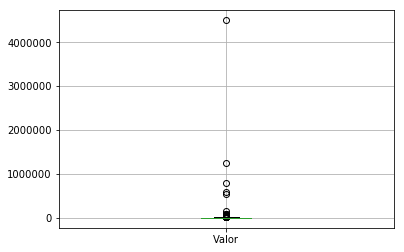

In [4]:
dados.boxplot('Valor')

In [5]:
dados[dados['Valor']>=50000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
121,Apartamento,Ipanema,4,6,1,700,65000.0,8860.0,5699.0,92.86,Apartamento
1220,Casa de Condomínio,Barra da Tijuca,5,8,5,1150,60000.0,2000.0,1700.0,52.17,Casa
2251,Apartamento,Ipanema,4,6,4,700,65000.0,8860.0,599.0,92.86,Apartamento
4059,Casa de Condomínio,Jardim Botânico,4,6,4,600,50000.0,0.0,0.0,83.33,Casa
4863,Apartamento,Ipanema,5,3,4,806,90000.0,9170.0,6000.0,111.66,Apartamento
4962,Apartamento,Ipanema,4,1,4,470,55000.0,7500.0,3200.0,117.02,Apartamento
5584,Apartamento,Leblon,4,2,2,650,51000.0,7000.0,0.0,78.46,Apartamento
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
7673,Apartamento,Leblon,4,2,2,791,50000.0,2600.0,1980.0,63.21,Apartamento
9392,Apartamento,Ipanema,4,2,2,467,55000.0,8000.0,0.0,117.77,Apartamento


In [6]:
valor = dados['Valor']

In [7]:
Q1 = valor.quantile(.25)
Q1

1600.0

In [8]:
Q2 = valor.quantile(.50)
Q2

2700.0

In [9]:
Q3 = valor.quantile(.75)
Q3

5500.0

In [10]:
IIQ = Q3 - Q1
IIQ

3900.0

In [27]:
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [12]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

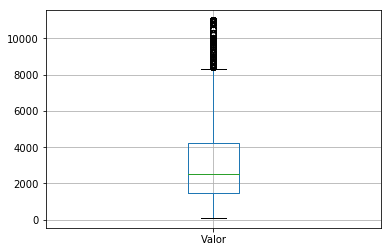

In [13]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F6809FF60>]],
      dtype=object)

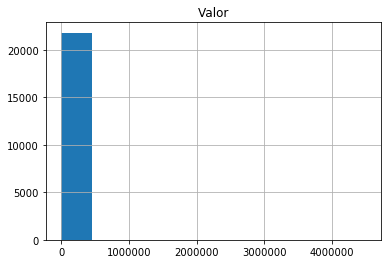

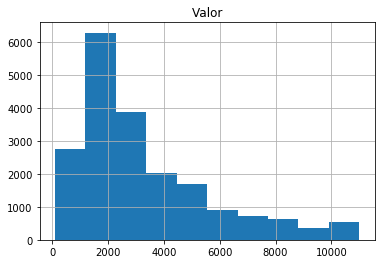

In [14]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

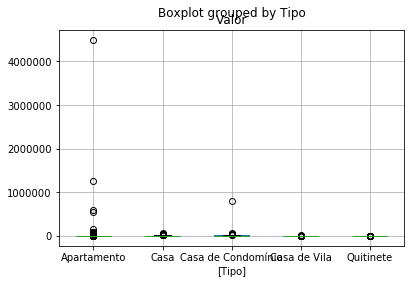

In [19]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [22]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [24]:
# uma variavel, é uma Series, um conjunto de Series é um DataFrame
type(grupo_tipo)

pandas.core.groupby.groupby.SeriesGroupBy

In [26]:
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     7,     8,     9,    11,    13,    14,
                15,
             ...
             21813, 21814, 21816, 21817, 21818, 21819, 21821, 21823, 21824,
             21825],
            dtype='int64', length=18780),
 'Casa': Int64Index([    1,    22,    54,    57,    96,   100,   144,   160,   180,
               238,
             ...
             21582, 21606, 21614, 21667, 21672, 21699, 21756, 21781, 21793,
             21804],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    5,     6,    12,    16,    42,    58,   166,   168,   183,
               207,
             ...
             21709, 21711, 21719, 21752, 21763, 21764, 21782, 21791, 21801,
             21820],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   81,   212,   220,   303,   332,   697,   822,   844,   918,
              1012,
             ...
             21184, 21189, 21253, 21325, 21353, 21366, 21588, 21635, 21716

In [28]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [29]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [30]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [31]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [32]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [33]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [34]:
limite_superior['Apartamento']

9950.0

In [38]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

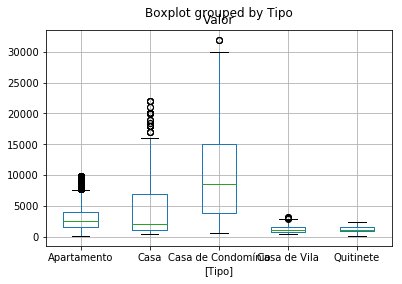

In [39]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [40]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv', sep = ';', index = False)